# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


#Answer


learning rate directly affects the convergence of the model, a low learning rate could lead to very slow convergence while a very high one could lead to divergence.

Some common strategies for adapting learning rate include -

1) Decreasing the learning rate based on the epoch number which can avoid divergence while also reaching convergence quickly.

2) Cyclic learning rates which involve periodically varying the learning rate between a lower and upper bound, which can help the model escape local minima and saddle points.


#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [29]:
datas = pd.read_csv("sample_data/Realestate.csv")
datas = datas.dropna()
datas = datas.drop(columns=["No"])
X = datas.drop("Y house price of unit area", axis = 1).to_numpy()
Y = datas["Y house price of unit area"].to_numpy()
x_s, x_t, y_s, y_t = train_test_split(X, Y, test_size=0.25)
a = MinMaxScaler()
x_s = a.fit_transform(x_s)
x_t = a.transform(x_t)

In [30]:
sch = linear_model.SGDRegressor()
ch = linear_model.LinearRegression()
sch.fit(x_s, y_s)
ch.fit(x_s, y_s)

y_pred1 = sch.predict(x_t)
y_pred2 = ch.predict(x_t)
print("Schocastic")
print("MSE:",mean_squared_error(y_pred1, y_t))
print("R2 SCORE:",r2_score(y_pred1, y_t))
print()
print("Batch")
print("MSE:",mean_squared_error(y_pred2, y_t))
print("R2 SCORE:",r2_score(y_pred2, y_t))

Schocastic
MSE: 74.57630749766355
R2 SCORE: 0.3504360868545071

Batch
MSE: 75.15190936931191
R2 SCORE: 0.32843870104876804


# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



#Answer

a) It is a supervised learning algorithm

b) Entropy is a measure of impurity or randomness in a group of data points. It quantifies how "mixed" the class labels are in a node.

c) Reduction in entropy indicates how much randomness in removed in the chilren nodes, if entropy is reduced then the child nodes are purer.

d)
1)

we know,
entropy = -sum( pi * log2(pi))

so, calculating it for this data, we get-

-(0.5*log2(0.5) + 0.5*log2(0.5)
= 1.00

<br>

2)

(x <= -2)

entropy1 = 0

entropy2 = 0.85

(x <= 2)

entropy1 = 0.85

entropy2 = 0

(y <= 2)

entropy1 = 0.64

entropy2 = 0.64

The 3rd split should be chosen

<br>

3)

(x <= -2)

reduction = 1 - (0*1 + 0.85*9)/10 =  1 - 0.76 = 0.24

(x <= 2)

reduction = 1 - 0.76 = 0.24

(y <= 2)

reduction = 1 - 0.64 = 0.36

<br>

4)

The best split is the 3rd one

### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


In [31]:
datas = load_iris()
x_s, x_t, y_s, y_t = train_test_split(datas.data, datas.target, test_size=0.3)

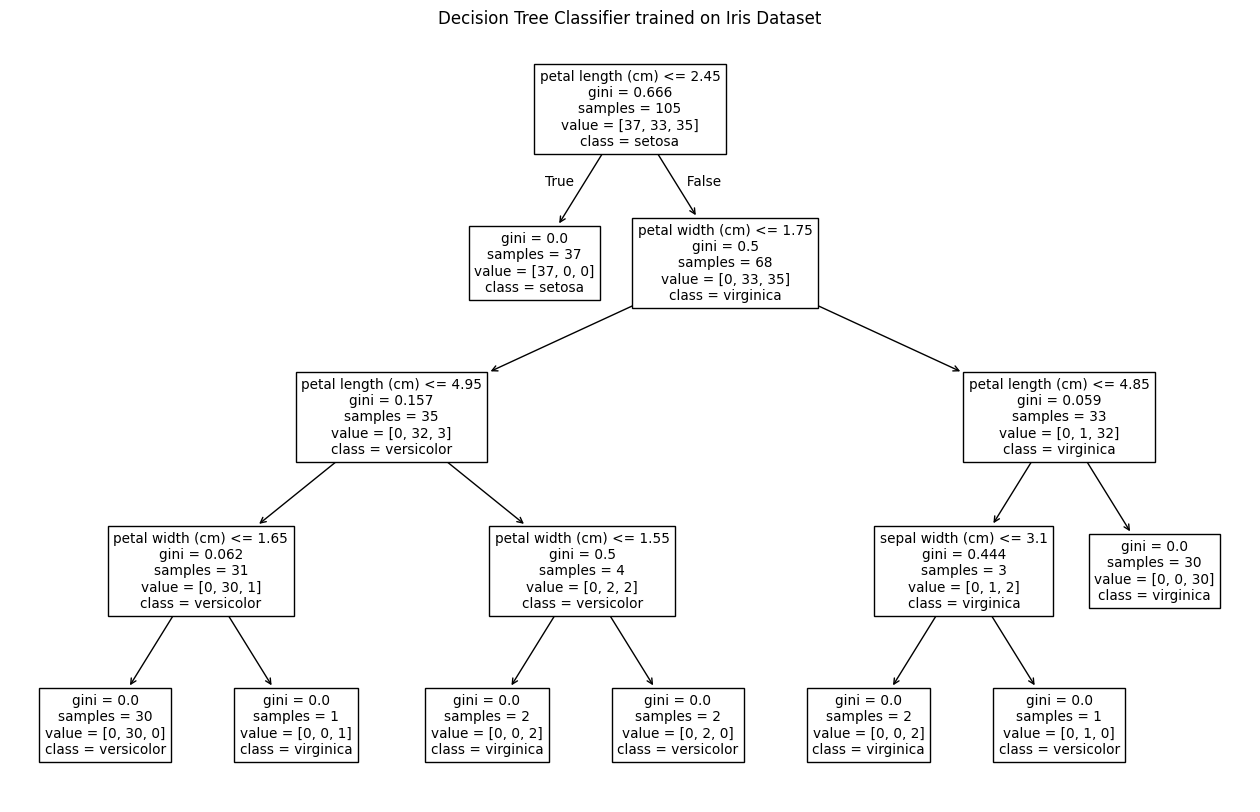

In [32]:
model = DecisionTreeClassifier()
model.fit(x_s, y_s)

plt.figure(figsize=(16, 10))
plot_tree(
    model,
    feature_names=datas.feature_names,
    class_names=datas.target_names,
)
plt.title("Decision Tree Classifier trained on Iris Dataset")
plt.show()

# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



#Answer

a) SVM is a supervised learning algorithm since it is trained on labeled training data to find the appropraite hyperplane seprating the different classes.

<br>

b) margin is the distance of the hyperplane from the closest points in both classes, maximising the margin makes the model less suseptible to small variations/noise in the data and reduces misclassification of unseen data.

<br>

c) They are the dataset points which are the closest to the hyperplane which is the desicion boundary, they are important as they are the points that mostly help in deciding the decision boundary while the points farther away don't have much contribution.

<br>

d) It helps in handling non-linear data by mapping it to higher dimensional space without exactly computing the mapping.
Two commonly used kernel functions are -

1)Radial Basis Function kernel

2)sigmoid kernel



### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

#Answer

a) It chooses the optimal separating hyperplane by minimizing its margin. Because, as mentioned earlier, a lower margin is key to having good generalization and reduce misclassification.

b) In such cases, SVM allows some missclassifications by means of allowing some data points to violate margin constraints. Or, it uses kernel functions to map the data to higher dimension where it may become linearly separable

c) the regularization parameter allows you control over the balance between maximizing the marin or reducing misclassification

low c: allows more misclassification, leading to a wider margin than normal, which in turn can cause underfitting

high c: allows less misclassification, leading to a thin margin, which in turn can cause overfitting